Data loaded successfully.
Data loaded successfully.
                        Question  \
0              What's your name?   
1                   Who are you?   
2  Could you introduce yourself?   
3          May I know your name?   
4    What is Neymar's full name?   

                                              Answer  
0  I'm a chatbot here to provide information abou...  
1  I'm a chatbot dedicated to discussing Neymar a...  
2  Sure! I'm a chatbot designed to assist with qu...  
3  Of course! I'm here to talk about Neymar and a...  
4  Neymar's full name is Neymar da Silva Santos J...  

Checking for null values...
Question    0
Answer      0
dtype: int64
Dataset Shape: (287, 2)


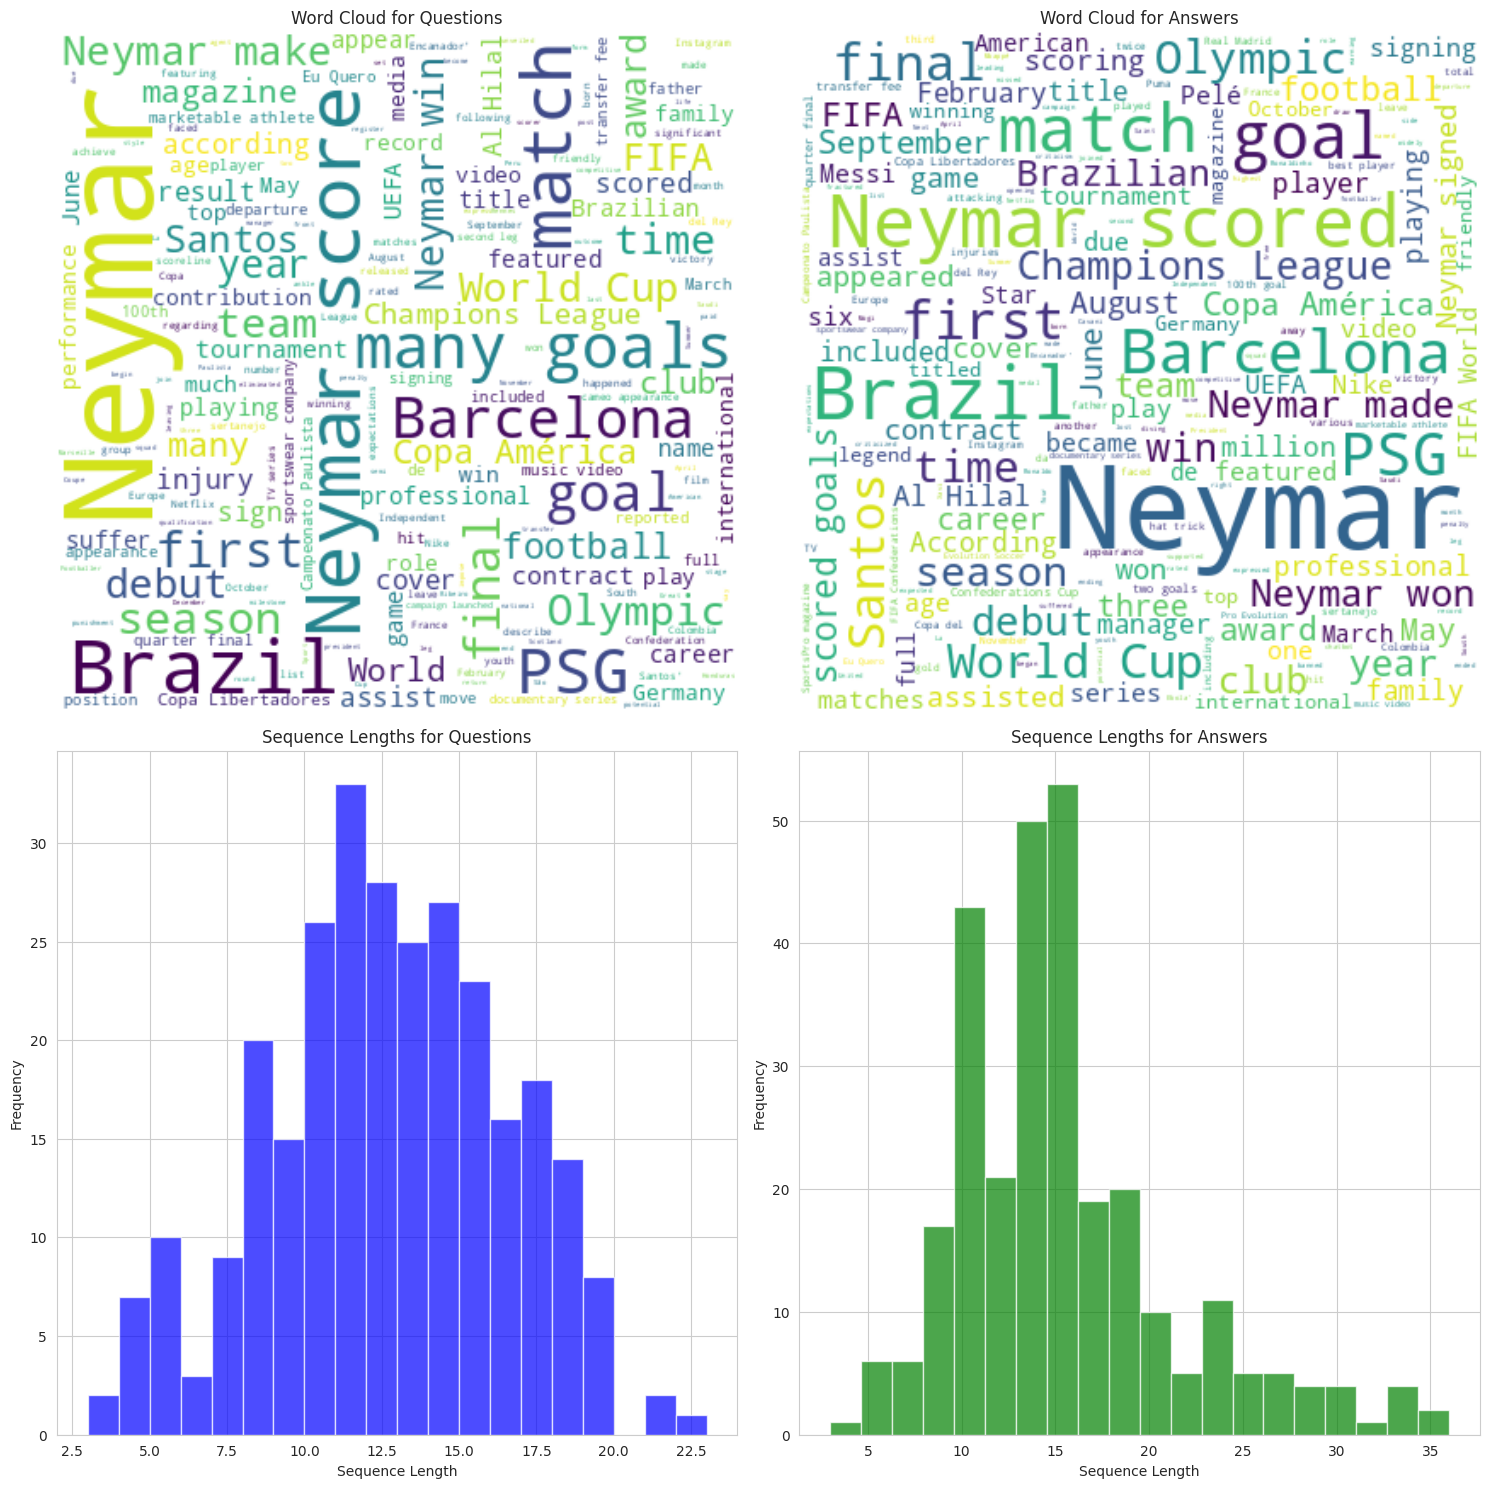


Vocabulary Size: 1182
Max Sequence Length: 37
Input Sequences Shape: (287, 37)
One-Hot Response Sequences Shape: (287, 37, 1182)

--- Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - accuracy: 0.5474 - loss: 4.1017
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 42s 158ms/step - accuracy: 0.6177 - loss: 2.6636
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.6103 - loss: 2.6377
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.6120 - loss: 2.5704
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - accuracy: 0.6179 - loss: 2.5035
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 42s 156ms/step - accuracy: 0.6139 - loss: 2.4596
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.6125 - loss: 2.4381
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.6188 - loss: 2.3717
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - accuracy: 0.6051 - loss: 2.4626
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.6209 - loss: 2.3457
Model training complete.

--- Testing the Chatbot ---
Q: What is Neymar's fu

In [4]:
# ==============================================================================
# 1. Setup, Installation, and Imports (Colab Optimized)
# ==============================================================================

# Install necessary libraries
!pip install contractions
!pip install emoji        # <-- FIX for ModuleNotFoundError: No module named 'emoji'
!pip install wordcloud

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns      # <-- FIX for NameError: name 'sns' is not defined
from wordcloud import WordCloud
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import emoji
import contractions # Keep this import if you still plan to use contractions for a cleaner corpus

# Set plotting style (Now possible after importing seaborn)
sns.set_style("whitegrid")

# ==============================================================================
# 2. Data Loading and Preprocessing
# NOTE: Ensure 'NLP_Neymar_ChatBot_Dataset.csv' is uploaded to the Colab files!
# ==============================================================================

# Load data from CSV file (Path adjusted for Colab)
csv_file = 'NLP_Neymar_ChatBot_Dataset.csv'
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Error: The file {csv_file} was not found. Please upload the dataset or check the path.")
    # Exit or raise error if data is missing
    raise

print("Data loaded successfully.")

# Preprocessing: Remove extra spaces
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    # Add other preprocessing steps here if needed, like emoji/contraction handling
    return text

df['Question'] = df['Question'].astype(str).apply(preprocess_text)
df['Answer'] = df['Answer'].astype(str).apply(preprocess_text)

# ... (rest of your code, Sections 3 through 7, remains the same)

# Set plotting style
sns.set_style("whitegrid")

# ==============================================================================
# 2. Data Loading and Preprocessing
# NOTE: Ensure 'NLP_Neymar_ChatBot_Dataset.csv' is uploaded to the Colab files!
# ==============================================================================

# Load data from CSV file (Path adjusted for Colab)
csv_file = 'NLP_Neymar_ChatBot_Dataset.csv'
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Error: The file {csv_file} was not found. Please upload the dataset or check the path.")
    # Stop execution if data is missing
    exit()

print("Data loaded successfully.")
print(df.head())

# Preprocessing: Remove extra spaces
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Question'] = df['Question'].astype(str).apply(preprocess_text)
df['Answer'] = df['Answer'].astype(str).apply(preprocess_text)

# Data Analysis
print("\nChecking for null values...")
print(df.isnull().sum())
print(f"Dataset Shape: {df.shape}")

# ==============================================================================
# 3. Visualizations (Word Clouds and Length Histograms)
# ==============================================================================

# Word Cloud for Questions
question_text = ' '.join(df['Question'])
wordcloud_questions = WordCloud(width=400, height=400, background_color='white').generate(question_text)

# Word Cloud for Answers
answer_text = ' '.join(df['Answer'])
wordcloud_answers = WordCloud(width=400, height=400, background_color='white').generate(answer_text)

# Plot Sequence Lengths
question_lengths = [len(question.split()) for question in df['Question']]
answer_lengths = [len(answer.split()) for answer in df['Answer']]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Plot word clouds
axs[0, 0].imshow(wordcloud_questions, interpolation='bilinear')
axs[0, 0].axis('off')
axs[0, 0].set_title('Word Cloud for Questions')
axs[0, 1].imshow(wordcloud_answers, interpolation='bilinear')
axs[0, 1].axis('off')
axs[0, 1].set_title('Word Cloud for Answers')

# Plot sequence lengths
axs[1, 0].hist(question_lengths, bins=20, alpha=0.7, label='Questions', color='blue')
axs[1, 0].set_title('Sequence Lengths for Questions')
axs[1, 0].set_xlabel('Sequence Length')
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].hist(answer_lengths, bins=20, alpha=0.7, label='Answers', color='green')
axs[1, 1].set_title('Sequence Lengths for Answers')
axs[1, 1].set_xlabel('Sequence Length')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# ==============================================================================
# 4. Tokenization, Padding, and One-Hot Encoding
# ==============================================================================

# Split data into inputs and responses
inputs = df['Question'].tolist()
responses = df['Answer'].tolist()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(inputs + responses)
vocab_size = len(tokenizer.word_index) + 1
print(f"\nVocabulary Size: {vocab_size}")

input_sequences = tokenizer.texts_to_sequences(inputs)
response_sequences = tokenizer.texts_to_sequences(responses)

# Determine maximum sequence length
max_sequence_length = max(len(seq) for seq in (input_sequences + response_sequences))
print(f"Max Sequence Length: {max_sequence_length}")

# Padding
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='post')
# We need to pad the responses too, as the output sequence must match the input length
response_sequences = pad_sequences(response_sequences, maxlen=max_sequence_length, padding='post')

# Convert responses to one-hot encoded format
# Using a slightly more efficient method than list comprehension, but both are fine.
response_sequences_one_hot = np.array([to_categorical(seq, num_classes=vocab_size)
                                       for seq in response_sequences])

# Confirm shapes
print(f"Input Sequences Shape: {input_sequences.shape}")
print(f"One-Hot Response Sequences Shape: {response_sequences_one_hot.shape}")


# ==============================================================================
# 5. Model Definition and Training
# ==============================================================================

# Build BiLSTM model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_sequence_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n--- Model Summary ---")
model.summary()

# Train the model
print("\n--- Starting Model Training ---")
history = model.fit(
    input_sequences,
    response_sequences_one_hot, # Use the one-hot encoded responses here
    epochs=10,
    batch_size=2
)
print("Model training complete.")


# ==============================================================================
# 6. Chatbot Prediction Function
# ==============================================================================

# Reverse index for decoding
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}

def chat(input_text):
    """Generates a response for a given input query."""
    # 1. Preprocess and Tokenize Input
    processed_input = preprocess_text(input_text)
    tokenized_input = tokenizer.texts_to_sequences([processed_input])

    # 2. Pad Input Sequence
    padded_input = pad_sequences(tokenized_input, maxlen=max_sequence_length, padding='post')

    # 3. Predict Response
    # The model predicts the probability distribution for the next word at each timestep.
    prediction = model.predict(padded_input, verbose=0)[0]

    # 4. Decode Prediction (Greedy Search)
    response_sequence = [np.argmax(t) for t in prediction]

    decoded_response = []
    # Skip the first token if it's padding (0)
    for token in response_sequence:
        if token != 0:
            word = reverse_word_index.get(token, '?') # Use '?' for unknown tokens
            decoded_response.append(word)

    # 5. Clean up and return response
    final_response = ' '.join(decoded_response).strip()
    return final_response.replace(' ?', '').capitalize()


# ==============================================================================
# 7. Testing the Chatbot
# ==============================================================================

print("\n--- Testing the Chatbot ---")
test_questions = [
    "What is Neymar's full name?",
    "When did he win the Champions League?",
    "who are you?"
]

for q in test_questions:
    response = chat(q)
    print(f"Q: {q}")
    print(f"A: {response}\n")